In [1]:
# Lab Ass

In [2]:
# Name : 
# Roll : 

# Libraries

In [3]:
import warnings

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Inits

In [4]:
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

# Loading Data

In [5]:
file_name = "Data.csv"
data = pd.read_csv(file_name)

In [6]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,56000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    22 non-null     object 
 1   Age        20 non-null     float64
 2   Salary     20 non-null     float64
 3   Purchased  22 non-null     object 
dtypes: float64(2), object(2)
memory usage: 832.0+ bytes


In [9]:
data.describe()

,Age,Salary
count,20.000000,20.00000
mean,39.800000,64100.00000
std,9.139849,10881.66009
min,27.000000,48000.00000
25%,34.250000,55500.00000
50%,37.500000,62500.00000
75%,48.000000,72250.00000
max,60.000000,83000.00000


In [10]:
data.isnull().sum()

Country      0
Age          2
Salary       2
Purchased    0
dtype: int64

# Preprocessing for Country

In [11]:
data['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Preprocessing for Age

(<AxesSubplot:xlabel='Age'>,)

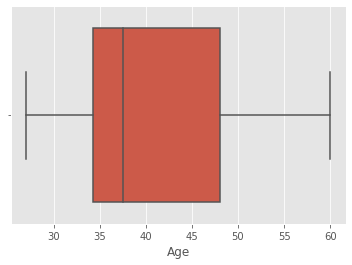

In [12]:
sns.boxplot(data['Age'], ),

(<AxesSubplot:xlabel='Age', ylabel='Density'>,)

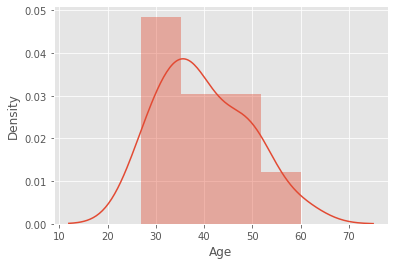

In [13]:
sns.distplot(data['Age'], kde = True, hist = True),

In [14]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [15]:
data['Age'].isnull().sum()

0

# Preprocessing for Salary

<AxesSubplot:xlabel='Salary'>

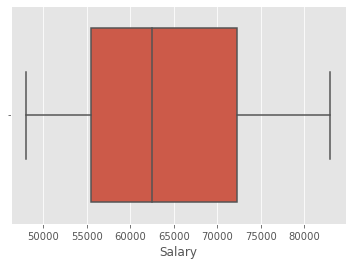

In [16]:
sns.boxplot(data['Salary'], )

<AxesSubplot:xlabel='Salary', ylabel='Density'>

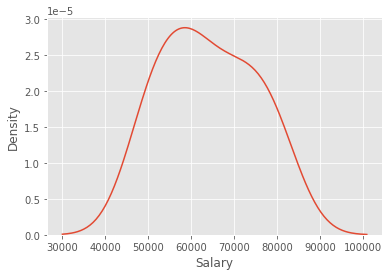

In [17]:
sns.kdeplot(data['Salary'])

<AxesSubplot:xlabel='Age', ylabel='Salary'>

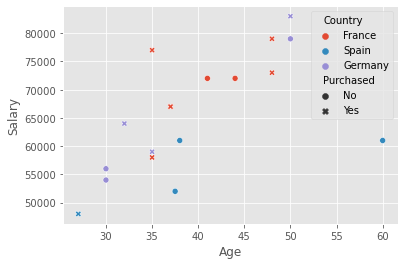

In [18]:
sns.scatterplot(data['Age'], data['Salary'], hue = data['Country'], style = data['Purchased'])

In [19]:
data['Salary'].fillna(data['Salary'].mean(), inplace = True)

In [20]:
data['Salary'].isnull().sum()

0

In [21]:
data.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

# Preprocessing and Ecoding for Purchased

In [23]:
print('Before', data['Purchased'].unique())

data['Purchased'].replace(to_replace = 'Yes', value = True, inplace = True)
data['Purchased'].replace(to_replace = 'No', value = False, inplace = True)

print('After', data['Purchased'].unique())

Before ['No' 'Yes']
After [False  True]


# Changing the dtype

In [24]:
data['Salary'] = data['Salary'].astype('float32')
data['Age'] = data['Age'].astype('int16')
data['Purchased'] = data['Purchased'].astype('bool')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    22 non-null     object 
 1   Age        22 non-null     int16  
 2   Salary     22 non-null     float32
 3   Purchased  22 non-null     bool   
dtypes: bool(1), float32(1), int16(1), object(1)
memory usage: 458.0+ bytes


# Viualization

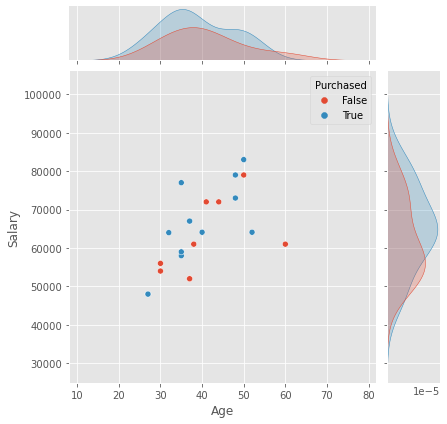

In [26]:
sns.jointplot(data['Age'], data['Salary'], hue = data['Purchased'])

<AxesSubplot:xlabel='Country', ylabel='Age'>

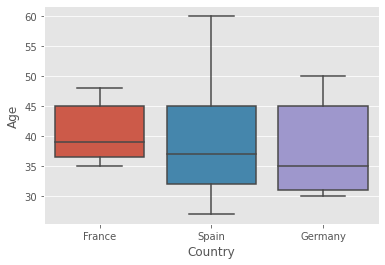

In [27]:
sns.boxplot(data['Country'], data['Age'])

<AxesSubplot:xlabel='Country', ylabel='Age'>

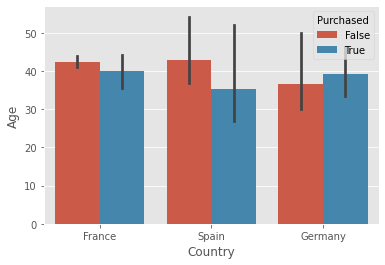

In [28]:
sns.barplot(data['Country'], data['Age'], hue = data['Purchased'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

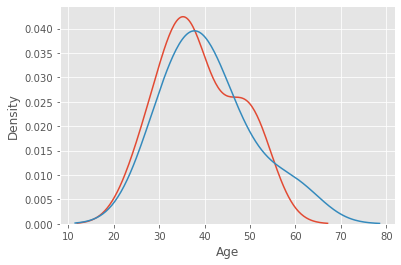

In [31]:
sns.kdeplot(data[data['Purchased'] == True]['Age'],)
sns.kdeplot(data[data['Purchased'] == False]['Age'],)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

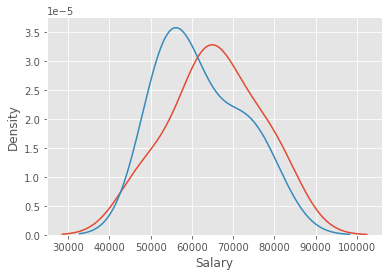

In [33]:
sns.kdeplot(data[data['Purchased'] == True]['Salary'],)
sns.kdeplot(data[data['Purchased'] == False]['Salary'],)

# Encoding for Country

In [34]:
OHE = OneHotEncoder()
array = OHE.fit_transform(data['Country'].to_numpy().reshape(-1, 1)).toarray()

In [35]:
country = pd.DataFrame(array, columns = OHE.categories_[0])
country.head()

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [36]:
data_ = data.copy()
del data_['Country']
data_ = pd.concat([country, data_], axis = 1)
data_.head()

,France,Germany,Spain,Age,Salary,Purchased
0,1.0,0.0,0.0,44,72000.0,False
1,0.0,0.0,1.0,27,48000.0,True
2,0.0,1.0,0.0,30,56000.0,False
3,0.0,0.0,1.0,38,61000.0,False
4,0.0,1.0,0.0,40,64100.0,True


# Normalization for Age

In [37]:
SS = StandardScaler()
array = SS.fit_transform(data['Age'].to_numpy().reshape(-1, 1)).reshape(1, -1)[0]

In [38]:
data_['Age'] = array
data_.head()

,France,Germany,Spain,Age,Salary,Purchased
0,1.0,0.0,0.0,0.522104,72000.0,False
1,0.0,0.0,1.0,-1.470417,48000.0,True
2,0.0,1.0,0.0,-1.118795,56000.0,False
3,0.0,0.0,1.0,-0.181138,61000.0,False
4,0.0,1.0,0.0,0.053276,64100.0,True


# Normalization for Salary

In [39]:
MMS = MinMaxScaler()
array = SS.fit_transform(data['Salary'].to_numpy().reshape(-1, 1)).reshape(1, -1)[0]

In [40]:
data_['Salary'] = array
data_.head()

,France,Germany,Spain,Age,Salary,Purchased
0,1.0,0.0,0.0,0.522104,0.781208,False
1,0.0,0.0,1.0,-1.470417,-1.592081,True
2,0.0,1.0,0.0,-1.118795,-0.800985,False
3,0.0,0.0,1.0,-0.181138,-0.306550,False
4,0.0,1.0,0.0,0.053276,0.000000,True
